In [1]:
#install and download needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor,BaggingRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import mean_squared_error,accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('NESN.SW.csv')

In [3]:
data.shape 

(7666, 7)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1994-02-24,12.96,12.96,12.96,12.96,7.071956,0
1,1994-02-25,12.98,12.98,12.98,12.98,7.082868,0
2,1994-02-28,12.83,12.83,12.83,12.83,7.001016,0
3,1994-03-01,12.60,12.60,12.60,12.60,6.875512,0
4,1994-03-02,12.33,12.33,12.33,12.33,6.728181,0


In [5]:
data.index 

RangeIndex(start=0, stop=7666, step=1)

In [6]:
data=data.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'})

In [7]:
data=data.drop(columns=['Adj Close'],axis=1)

In [8]:
data['date']=pd.to_datetime(data['date'])

In [9]:
data.set_index('date', inplace=True)

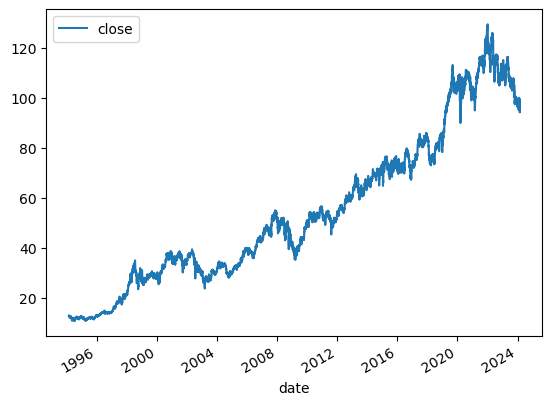

In [10]:
data.plot.line(y='close', use_index=True)
plt.savefig('NESN.SW.png');

In [11]:
data.describe()

,open,high,low,close,volume
count,7666.000000,7666.000000,7666.000000,7666.000000,7.666000e+03
mean,54.244291,54.588382,53.911008,54.256156,2.928554e+07
std,30.593876,30.835785,30.382177,30.609937,5.251210e+07
min,10.700000,10.700000,10.700000,10.700000,0.000000e+00
25%,30.600000,30.750000,30.442501,30.559999,0.000000e+00
50%,48.000000,48.477499,47.687500,48.025002,5.151198e+06
75%,74.199997,74.699997,73.715000,74.250000,1.422867e+07
max,129.800003,129.800003,128.160004,129.500000,6.377100e+08


In [11]:
data= data[data.index<'2023']

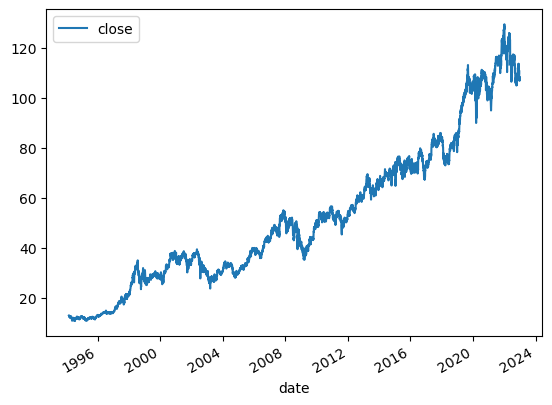

In [12]:
data.plot.line(y='close', use_index=True);

In [13]:
data['Tomorrow']=data['close'].shift(-1)

In [14]:
data['Previousday']=data['close'].shift(1)

In [15]:
data.head() 

,open,high,low,close,volume,Tomorrow,Previousday
date,,,,,,,
1994-02-24,12.96,12.96,12.96,12.96,0,12.98,NaN
1994-02-25,12.98,12.98,12.98,12.98,0,12.83,12.96
1994-02-28,12.83,12.83,12.83,12.83,0,12.60,12.98
1994-03-01,12.60,12.60,12.60,12.60,0,12.33,12.83
1994-03-02,12.33,12.33,12.33,12.33,0,12.37,12.60


In [16]:
data.head()

,open,high,low,close,volume,Tomorrow,Previousday
date,,,,,,,
1994-02-24,12.96,12.96,12.96,12.96,0,12.98,NaN
1994-02-25,12.98,12.98,12.98,12.98,0,12.83,12.96
1994-02-28,12.83,12.83,12.83,12.83,0,12.60,12.98
1994-03-01,12.60,12.60,12.60,12.60,0,12.33,12.83
1994-03-02,12.33,12.33,12.33,12.33,0,12.37,12.60


In [17]:
train = data.iloc[:-1000]
test = data.iloc[-1000:]

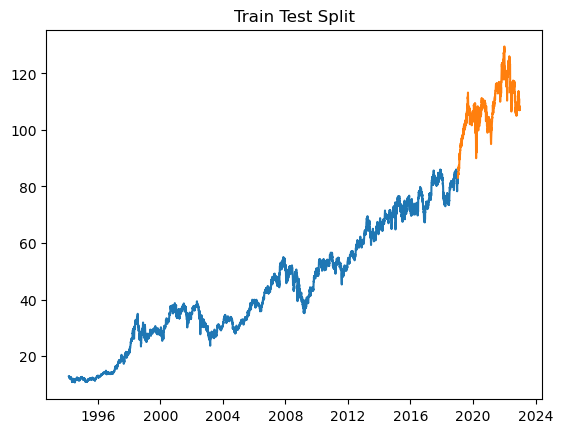

In [18]:
import matplotlib.pyplot as plt 
plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.title('Train Test Split');

In [19]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x:  features dataset
    y:  target values
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    abs_errors= np.abs(np.array(predicted) - np.array(y))
    min_abs_errors= np.min(abs_errors)
    max_abs_errors= np.max(abs_errors)
    med_abs_errors= np.median(abs_errors)
    mape = mean_absolute_percentage_error(y, predicted)

    print('MAE: {:.2f}'.format(mae))
    print('MAPE: {:.2f}'.format(mape))
    print('minae: {:.2f}'.format(min_abs_errors))
    print('maxae: {:.2f}'.format(max_abs_errors))
    print('medae: {:.2f}'.format(med_abs_errors))
    print()

In [20]:
#predictors_1 = ["close", "volume", "open", "high", "low"]
predictors_2 = ["volume", "open", "high", "low"]

In [21]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['close'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['close'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
MAE: 22.45
MAPE: 0.20
minae: 0.00
maxae: 43.82
medae: 22.17

Performance of "xgboost" on Validation and Test set:
Test set:
****************
MAE: 22.66
MAPE: 0.20
minae: 0.01
maxae: 44.02
medae: 22.37

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
MAE: 22.57
MAPE: 0.20
minae: 0.03
maxae: 43.95
medae: 22.30

Learning rate set to 0.356705
0:	learn: 13.5212958	total: 150ms	remaining: 14.9s
1:	learn: 8.9694153	total: 154ms	remaining: 7.55s
2:	learn: 6.0030024	total: 159ms	remaining: 5.15s
3:	learn: 4.0456600	total: 166ms	remaining: 3.98s
4:	learn: 2.7898960	total: 170ms	remaining: 3.23s
5:	learn: 2.0126608	total: 175ms	remaining: 2.75s
6:	learn: 1.5573570	total: 182ms	remaining: 2.41s
7:	learn: 1.2901858	total: 192ms	remaining: 2.21s
8:	learn: 1.1500294	total: 199ms	remaining: 2.01s
9:	learn: 1.0497546	total: 204ms	remaining: 1.84s
10:	learn: 1.0023108	total: 208ms	

#### Retrain the best Model(Extreme Gradient Boosting)

In [22]:
model= GradientBoostingRegressor()
model.fit(train[predictors_2], train['close'])
pred= model.predict(test[predictors_2])

In [23]:

pred= pd.Series(pred, index=test.index)
combined_2= pd.concat([test['close'], pred],axis=1)

In [24]:
#combined_1.plot();
combined_2

,close,0
date,,
2019-01-16,83.120003,83.260865
2019-01-17,83.940002,83.301632
2019-01-18,84.400002,84.041007
2019-01-21,84.199997,84.065913
2019-01-22,84.300003,84.338075
...,...,...
2022-12-23,107.820000,85.552466
2022-12-27,108.099998,85.552466
2022-12-28,108.099998,85.552466


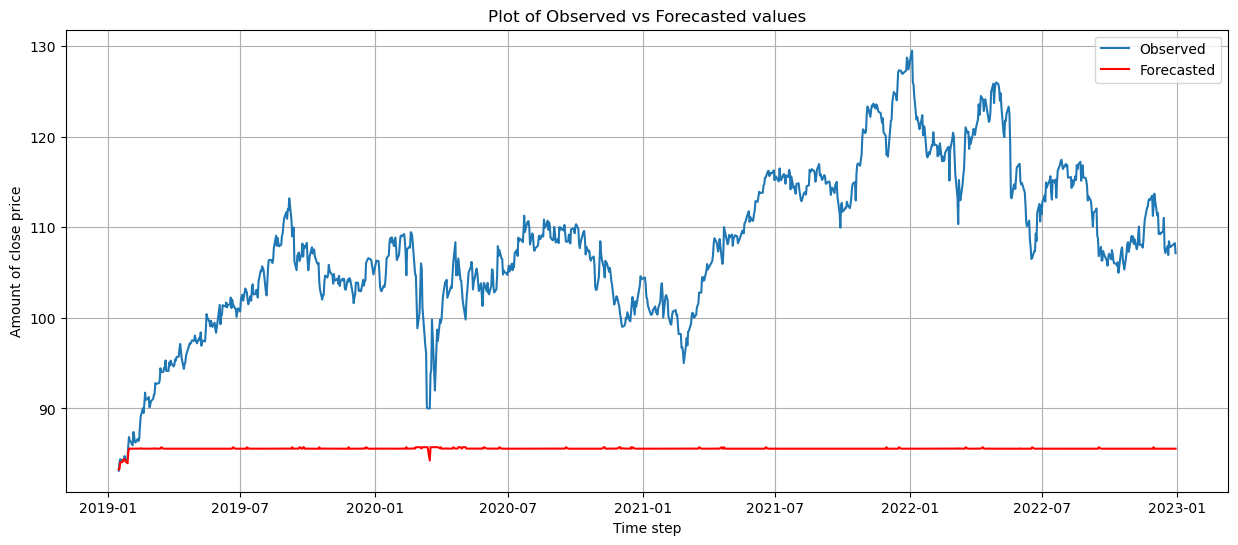

In [25]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_2['close'], label='Observed')
plt.plot(combined_2[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [26]:
#add additional predictors to the model
#calculate the mean close price in certain days and  find the ratio between today's closing price and that of the periods
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["close"] / rolling_averages["close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["close"]
    
    
    
    new_predictors+= [ratio_column, trend_column]

In [27]:
data['mom'] = data['close'].pct_change(12) # 12 month change

In [28]:
#Create the RSI indicator
#data['rsi' + str(n)] = talib.RSI(data['close'].values, timeperiod=horizon)
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [29]:
data['RSI']= computeRSI(data['close'], 14)

In [30]:
data.head()

,open,high,low,close,volume,Tomorrow,Previousday,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,mom,RSI
date,,,,,,,,,,,,,,,,,,,
1994-02-24,12.96,12.96,12.96,12.96,0,12.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-02-25,12.98,12.98,12.98,12.98,0,12.83,12.96,1.000771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-02-28,12.83,12.83,12.83,12.83,0,12.60,12.98,0.994188,25.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-01,12.60,12.60,12.60,12.60,0,12.33,12.83,0.990956,25.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-02,12.33,12.33,12.33,12.33,0,12.37,12.60,0.989170,25.43,0.967818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
data.shape 

(7377, 19)

In [32]:
new_data=data[new_predictors]
new_data['close']=data['close']
new_data['MOM']=data['mom']
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM
date,,,,,,,,,,,,
1994-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.96,NaN
1994-02-25,1.000771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.98,NaN
1994-02-28,0.994188,25.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.83,NaN
1994-03-01,0.990956,25.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.60,NaN
1994-03-02,0.989170,25.43,0.967818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.33,NaN


In [33]:
new_data['SMA_3'] = new_data.iloc[:,10].rolling(window=3).mean()
new_data['SMA_4'] = new_data.iloc[:,10].rolling(window=4).mean()

In [34]:
new_data['CMA_4'] = new_data['close'].expanding(min_periods=4).mean()

In [35]:
new_data['EMA'] = new_data.iloc[:,10].ewm(span=40,adjust=False).mean()

In [36]:
new_data=new_data.dropna()
new_data.shape 

(6377, 16)

In [37]:
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,SMA_3,SMA_4,CMA_4,EMA
date,,,,,,,,,,,,,,,,
1997-12-25,1.000000,42.350001,0.997552,106.520001,1.022412,1243.139994,1.149409,4602.080002,1.509703,14027.640002,21.190001,0.006651,21.180001,21.227501,14.034795,20.849214
1997-12-26,1.000000,42.380002,0.998586,106.210002,1.022231,1243.529996,1.147713,4608.890003,1.508821,14035.870003,21.190001,0.012906,21.190001,21.182501,14.041936,20.865838
1997-12-29,1.010507,42.380002,1.017204,106.100004,1.043453,1243.749998,1.170281,4615.700004,1.539897,14044.080004,21.639999,0.054067,21.340000,21.302501,14.049511,20.903602
1997-12-30,1.006428,42.830000,1.023056,106.370002,1.056292,1244.329998,1.183560,4622.820003,1.558788,14052.890003,21.920000,0.059961,21.583333,21.485000,14.057351,20.953182
1997-12-31,0.999315,43.559999,1.015024,107.130002,1.053966,1245.109999,1.180092,4630.100003,1.555597,14062.210003,21.889999,0.060048,21.816666,21.660000,14.065144,20.998881


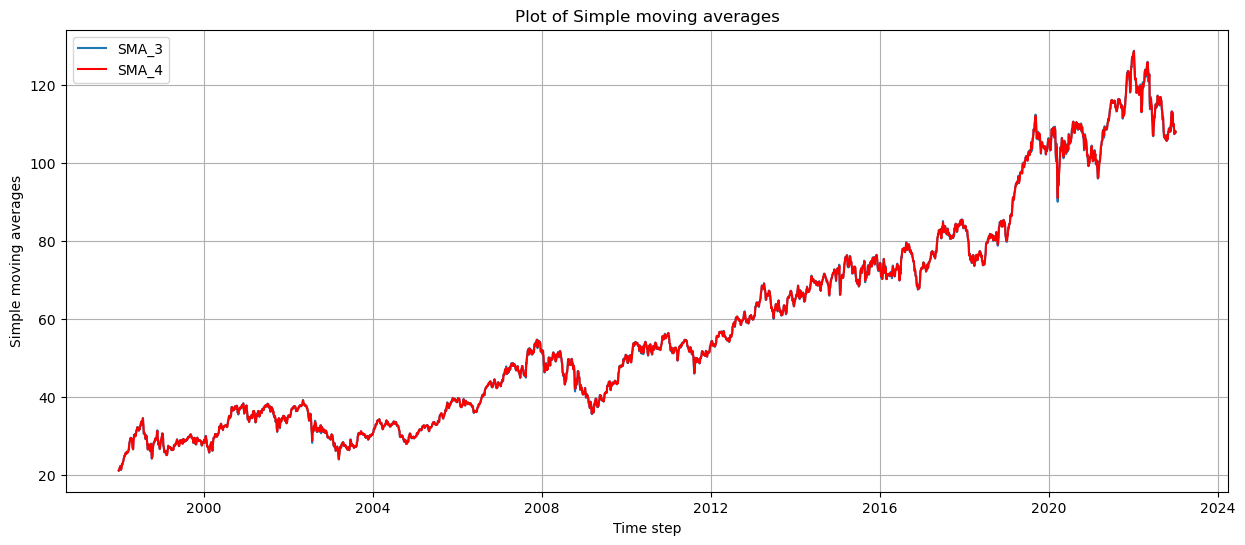

In [38]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['SMA_3'], label='SMA_3')
plt.plot(new_data['SMA_4'], color='r', label='SMA_4')
plt.title('Plot of Simple moving averages')
plt.ylabel('Simple moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

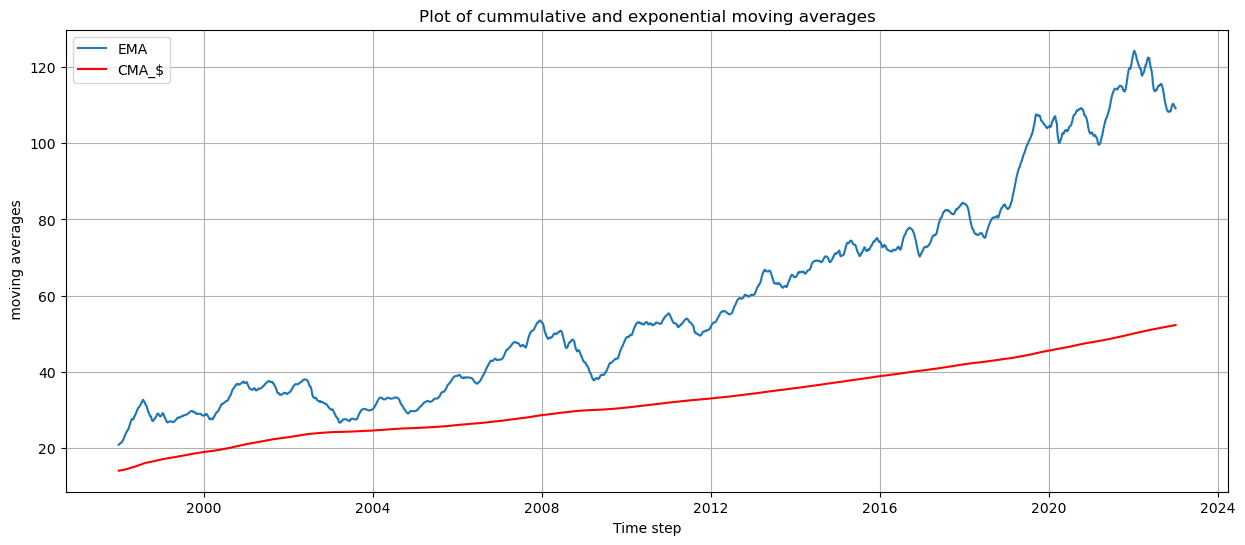

In [39]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['EMA'], label='EMA')
plt.plot(new_data['CMA_4'], color='r', label='CMA_$')
plt.title('Plot of cummulative and exponential moving averages')
plt.ylabel(' moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

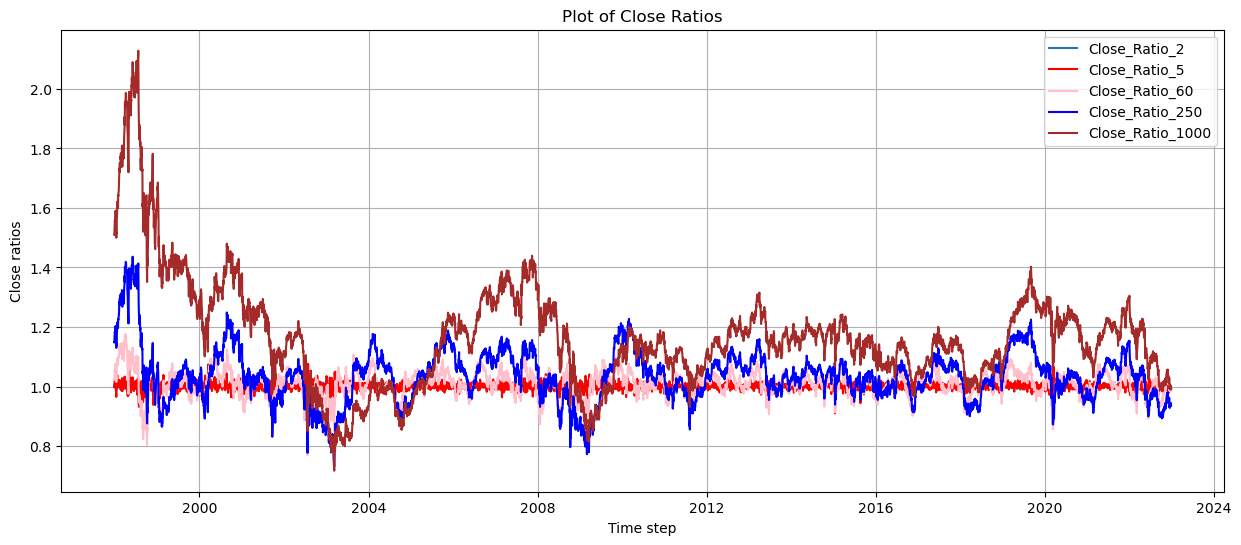

In [40]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Close_Ratio_2'], label='Close_Ratio_2')
plt.plot(new_data['Close_Ratio_5'], color='r', label='Close_Ratio_5')
plt.plot(new_data['Close_Ratio_60'], color='pink', label='Close_Ratio_60')
plt.plot(new_data['Close_Ratio_250'], color='b', label='Close_Ratio_250')
plt.plot(new_data['Close_Ratio_1000'], color='brown', label='Close_Ratio_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

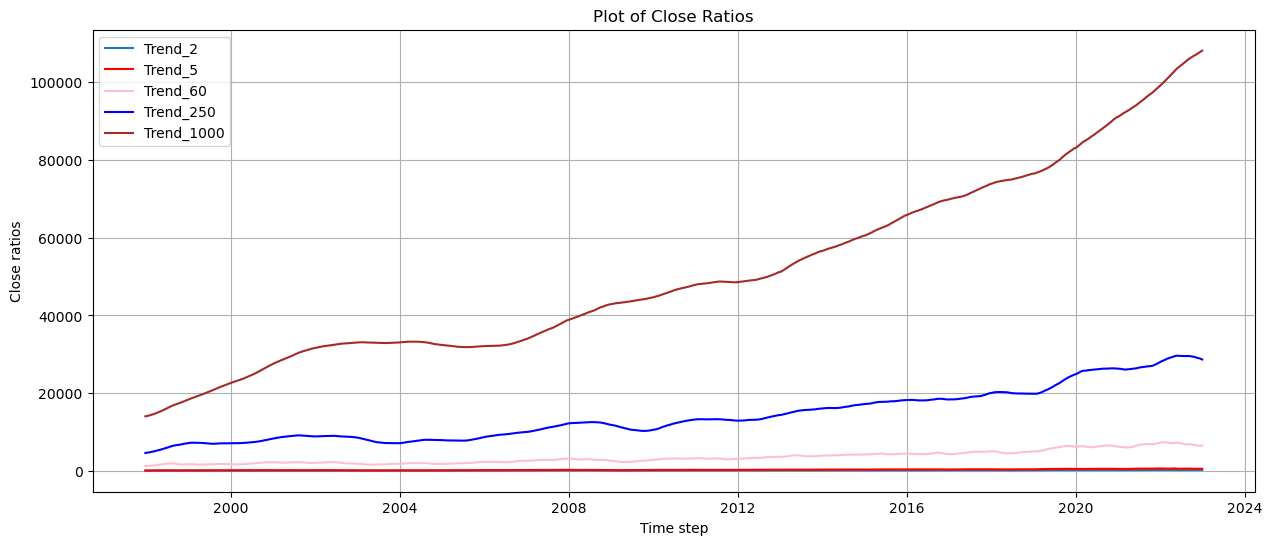

In [41]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Trend_2'], label='Trend_2')
plt.plot(new_data['Trend_5'], color='r', label='Trend_5')
plt.plot(new_data['Trend_60'], color='pink', label='Trend_60')
plt.plot(new_data['Trend_250'], color='b', label='Trend_250')
plt.plot(new_data['Trend_1000'], color='brown', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [42]:
new_data['RSI']=data['RSI']
new_data['previousday']=data['Previousday']  

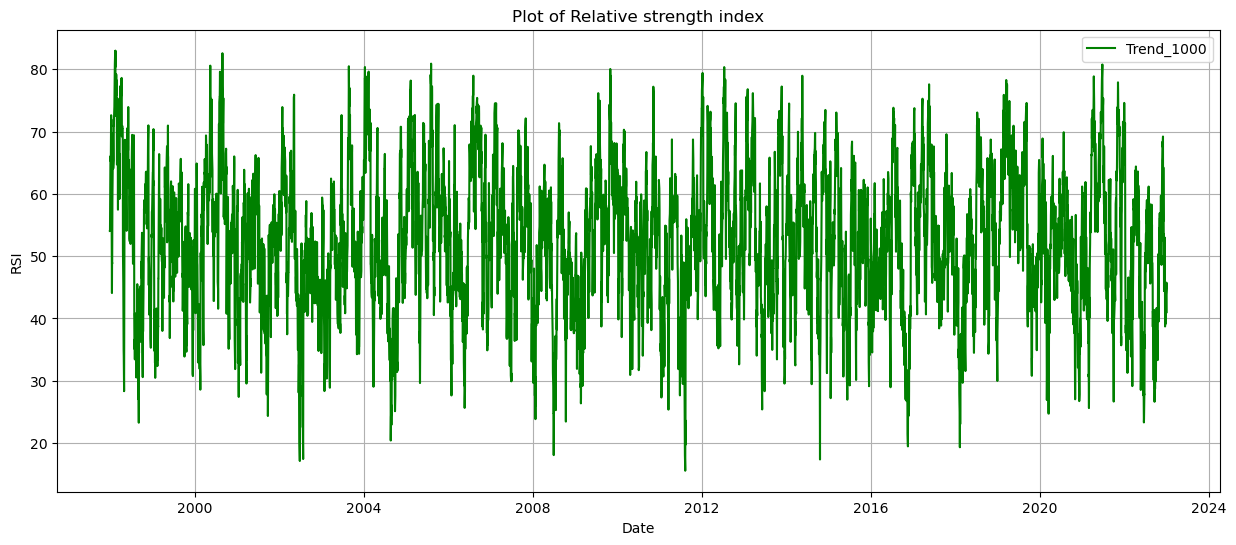

In [43]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['RSI'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Relative strength index')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

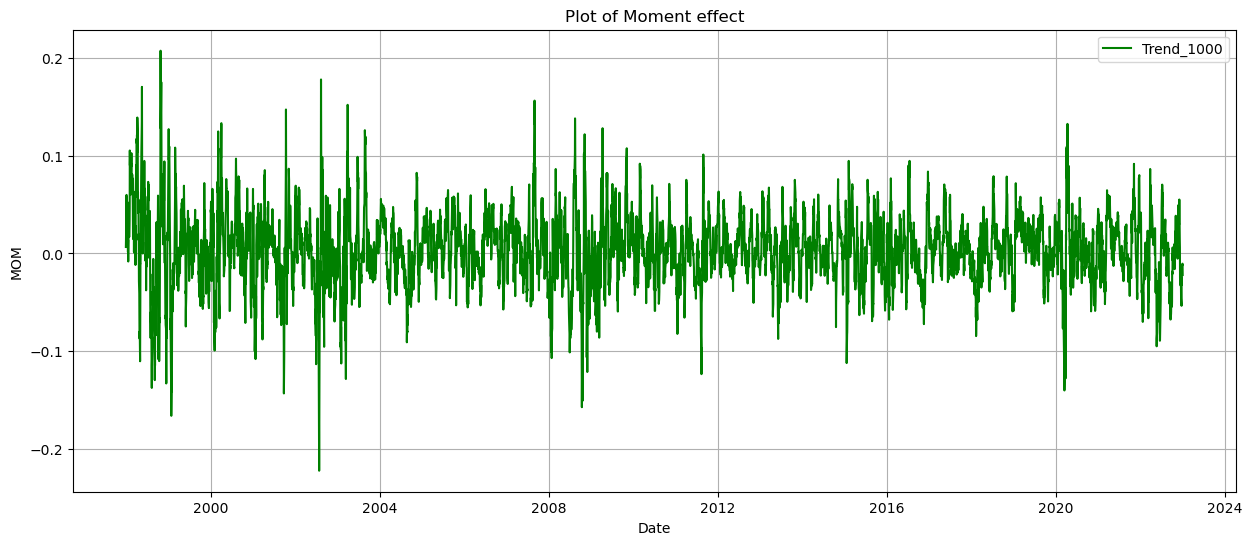

In [44]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['MOM'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Moment effect')
plt.ylabel('MOM')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [45]:
train = new_data.iloc[:-1000]
test = new_data.iloc[-1000:]

In [46]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday'],
      dtype='object')

In [47]:
predictors= ['SMA_3','SMA_4','EMA','RSI','MOM','previousday' ] 

#### Retrain the models on the new predictors

In [48]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors], train['close'])
    print(f'Performance of "{key}" on  Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors], test['close'])

Performance of "RF Regressor" on  Test set:
Test set:
****************
MAE: 22.94
MAPE: 0.21
minae: 0.01
maxae: 43.72
medae: 22.71

Performance of "xgboost" on  Test set:
Test set:
****************
MAE: 23.65
MAPE: 0.21
minae: 0.11
maxae: 43.64
medae: 23.48

Performance of "Gradient Boost" on  Test set:
Test set:
****************
MAE: 23.28
MAPE: 0.21
minae: 0.09
maxae: 43.93
medae: 23.08

Learning rate set to 0.34722
0:	learn: 11.7929551	total: 6.61ms	remaining: 655ms
1:	learn: 7.9783328	total: 14.4ms	remaining: 703ms
2:	learn: 5.4559918	total: 19ms	remaining: 613ms
3:	learn: 3.7650778	total: 23.5ms	remaining: 565ms
4:	learn: 2.7160950	total: 29.4ms	remaining: 560ms
5:	learn: 2.0292076	total: 36.3ms	remaining: 569ms
6:	learn: 1.6056808	total: 40.8ms	remaining: 543ms
7:	learn: 1.3542419	total: 44.9ms	remaining: 517ms
8:	learn: 1.2156423	total: 49.4ms	remaining: 499ms
9:	learn: 1.1405112	total: 63ms	remaining: 567ms
10:	learn: 1.0870065	total: 68.3ms	remaining: 553ms
11:	learn: 1.025758

#### Improving the model

In [49]:
#model_1 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
#n_estimators=200, min_samples_split=50, random_state=1
model_2= GradientBoostingRegressor(random_state=0)

def predict(train, test, predictors_1, model_1):
    model_1.fit(train[predictors_1], train["Target"])
    preds_1 = model_1.predict_proba(test[predictors_1])[:,1]
    preds_1[preds_1 >=.6] = 1
    preds_1[preds_1 <.6] = 0
    preds_1 = pd.Series(preds_1, index=test.index, name="Predictions_1")
    combined_1 = pd.concat([test["Target"], preds_1], axis=1)
    return combined_1 

In [50]:
def predict(train, test, predictors, model_2):
    model_2.fit(train[predictors], train["close"])
    preds_2 = model_2.predict(test[predictors])
    preds_2 = pd.Series(preds_2, index=test.index, name="Predictions_2")
    combined_2 = pd.concat([test["close"], preds_2], axis=1)
    return combined_2

In [51]:
def backtest(new_data, model_2, predictors, start=1500, step=250):
    all_predictions = []

    for i in range(start, new_data.shape[0], step):
        train = new_data.iloc[0:i].copy()
        test = new_data.iloc[i:(i+step)].copy()
        predictions_2 = predict(train, test, predictors, model_2)
        all_predictions.append(predictions_2)
    
    return pd.concat(all_predictions)

In [52]:
predictions_2 = backtest(new_data, model_2, predictors)

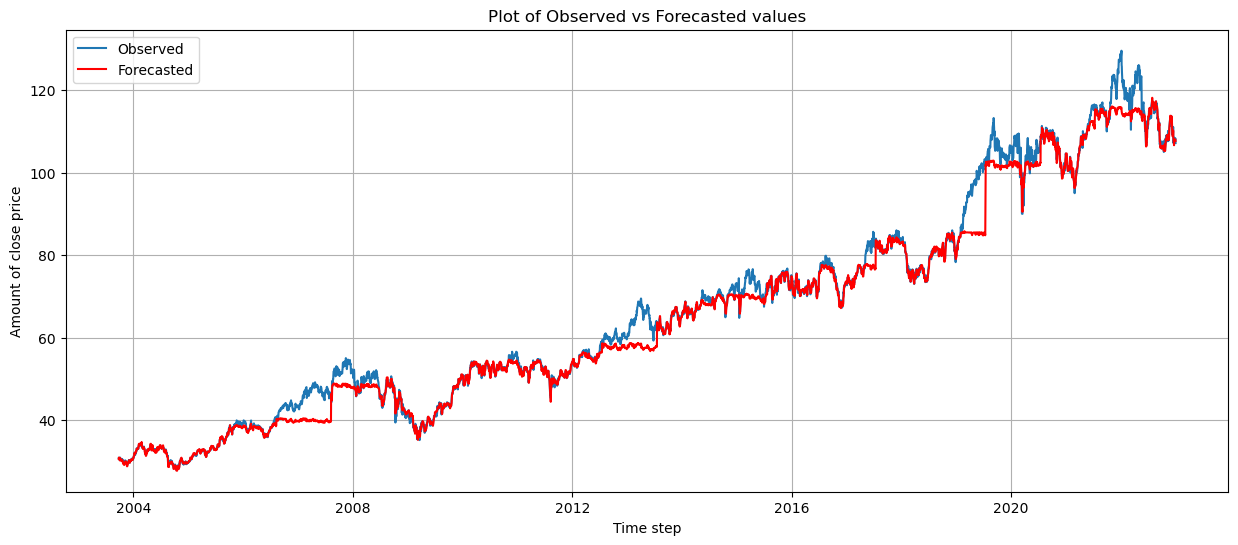

In [53]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(predictions_2['close'], label='Observed')
plt.plot(predictions_2['Predictions_2'], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [54]:
model_2.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [55]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [56]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.21191897270632248

mean absolute  error is : 23.43928432870694



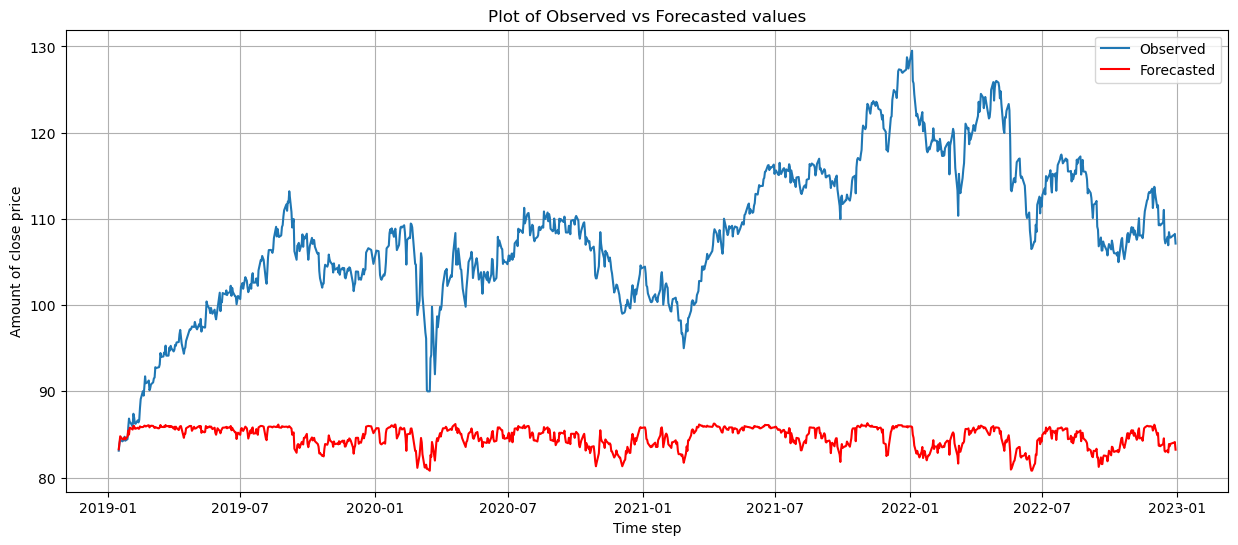

In [57]:
# Plot the test predictions and true values
pred= pd.Series(prediction, index=test.index)
plt.figure(figsize=(15,6))
plt.plot(test['close'], label='Observed')
plt.plot(pred, color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

#### Perform Hyper parameter tuning using grid searchcv

#possibe hyperparameters for random forest
hyper = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 6]
}

from sklearn.model_selection import GridSearchCV

cv_model= GridSearchCV(GradientBoostingRegressor(), param_grid=hyper)
cv_model.fit(train[predictors], train['close'])

print(cv_model.best_score_)
print(cv_model.best_estimator_)

In [58]:
model = GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1, min_samples_split=5)
model.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [59]:
grdb_mae =  mean_absolute_error(test['close'], prediction)
abs_errors= np.abs(np.array(prediction) - np.array(test['close']))
grdb_min_abs_errors= np.min(abs_errors)
grdb_max_abs_errors= np.max(abs_errors)
grdb_med_abs_errors= np.median(abs_errors)
grdb_mape = mean_absolute_percentage_error(test['close'], prediction)

In [60]:
print(f"Optimized Gradient boosting Performance Metrics \n\n \
gradientboost Mae: {grdb_mae} \n \
gradientboost minae: {grdb_min_abs_errors} \n \
gradientboost maxae: {grdb_max_abs_errors} \n \
gradientboost medae: {grdb_med_abs_errors} \n \
gradientboost Mape: {grdb_mape} \n \
 \n\n <-------------------------------------------------->\n")

Optimized Gradient boosting Performance Metrics 

 gradientboost Mae: 23.1931411137817 
 gradientboost minae: 0.08154279744961457 
 gradientboost maxae: 43.521262276582036 
 gradientboost medae: 22.994588321947738 
 gradientboost Mape: 0.20960500324703013 
  

 <-------------------------------------------------->



In [61]:
pred= pd.Series(prediction, index=test.index)
combined= pd.concat([test['close'], pred],axis=1)
combined 

,close,0
date,,
2019-01-16,83.120003,83.416086
2019-01-17,83.940002,83.858459
2019-01-18,84.400002,83.899859
2019-01-21,84.199997,84.364568
2019-01-22,84.300003,84.584503
...,...,...
2022-12-23,107.820000,84.281347
2022-12-27,108.099998,84.304190
2022-12-28,108.099998,84.335089


In [62]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [63]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.20960500324703013

mean absolute  error is : 23.1931411137817



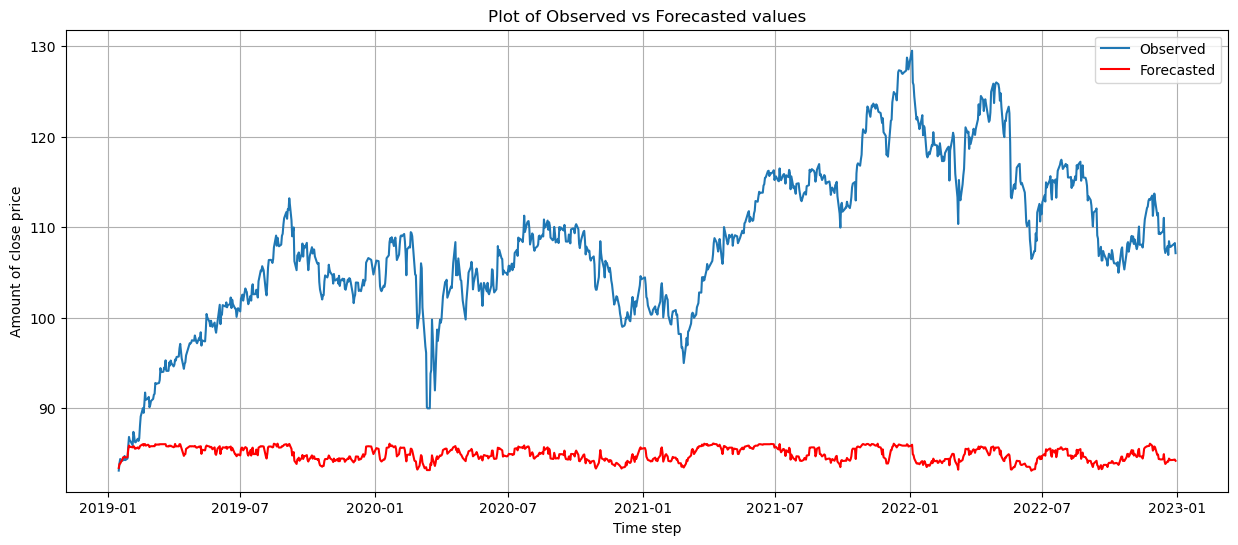

In [64]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['close'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

### Stacking and Bagging

In [65]:
# List of machine learning algorithms to consider
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet 
algorithms = [
    ('Linear regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {}),
    ('Lasso', Lasso(), {}),
    ('Elastic Net', ElasticNet(), {}),
    #('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr'), {}),
    ('MLP', MLPRegressor(), {})
]

# Train base models
base_models = {}
for algorithm_name, algorithm, _ in algorithms:
    print(algorithm)
    model = algorithm
    model.fit(train[predictors], train['close'])
    base_models[algorithm_name] = model

eval_metrics = ['mae', 'mape']
results = pd.DataFrame(columns=['Algorithm'] + eval_metrics)

for algorithm_name, model in base_models.items():
    y_pred = model.predict(test[predictors])
    mae= mean_absolute_error(test['close'], y_pred)
    mape =mean_absolute_percentage_error(test['close'], y_pred)

# Ensembling using Bagging with all base models
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)
bagging_model.fit(train[predictors], train['close'])
bagging_y_pred = bagging_model.predict(test[predictors])
bagging_mae = mean_absolute_error(test['close'], bagging_y_pred)
abs_errors= np.abs(np.array(bagging_y_pred) - np.array(test['close']))
bagg_min_abs_errors= np.min(abs_errors)
bagg_max_abs_errors= np.max(abs_errors)
bagg_med_abs_errors= np.median(abs_errors)
bagging_mape = mean_absolute_percentage_error(test['close'], bagging_y_pred)
print(f"Bagging Ensemble Method Performance Metrics \n\n \
bagging Mae: {bagging_mae} \n \
bagging minae: {bagg_min_abs_errors} \n \
bagging maxae: {bagg_max_abs_errors} \n \
bagging medae: {bagg_med_abs_errors} \n \
bagging Mape: {bagging_mape} \n \
 \n\n <-------------------------------------------------->\n")

# Ensembling using Stacking
meta_model = Ridge()
stacking_model = StackingRegressor(estimators=list(base_models.items()), final_estimator=meta_model)
stacking_model.fit(train[predictors], train['close'])
stacking_y_pred = stacking_model.predict(test[predictors])
stacking_mae =  mean_absolute_error(test['close'], stacking_y_pred)
abs_errors= np.abs(np.array(stacking_y_pred) - np.array(test['close']))
stack_min_abs_errors= np.min(abs_errors)
stack_max_abs_errors= np.max(abs_errors)
stack_med_abs_errors= np.median(abs_errors)
stacking_mape = mean_absolute_percentage_error(test['close'], stacking_y_pred)
print(f"Stacking Ensemble Method Performance Metrics \n\n \
stacking mae: {stacking_mae} \n \
stacking minae: {stack_min_abs_errors} \n \
stacking maxae: {stack_max_abs_errors} \n \
stacking medae: {stack_med_abs_errors} \n \
stacking mape: {stacking_mape} \n")




#print(f"Stacking F1 Score: {stacking_f1}")


LinearRegression()
Ridge()
Lasso()
ElasticNet()
MLPRegressor()
Bagging Ensemble Method Performance Metrics 

 bagging Mae: 22.878150114 
 bagging minae: 0.003997899999987453 
 bagging maxae: 43.70500030000001 
 bagging medae: 22.603502500000005 
 bagging Mape: 0.2066591432809793 
  

 <-------------------------------------------------->

Stacking Ensemble Method Performance Metrics 

 stacking mae: 0.4558583825852491 
 stacking minae: 0.0003841456930331333 
 stacking maxae: 4.7104714299323405 
 stacking medae: 0.35915976065467703 
 stacking mape: 0.004212598869775504 



In [66]:
bagging_y_pred= pd.Series(bagging_y_pred, index=test.index)
stacking_y_pred= pd.Series(stacking_y_pred, index=test.index)

In [67]:
combined_stack= pd.concat([test['close'], stacking_y_pred],axis=1)
combined_bagg= pd.concat([test['close'], bagging_y_pred], axis=1)

In [68]:
combined_bagg.head()

,close,0
date,,
2019-01-16,83.120003,83.327001
2019-01-17,83.940002,83.695999
2019-01-18,84.400002,84.054000
2019-01-21,84.199997,84.186001
2019-01-22,84.300003,84.304001


In [69]:
combined_stack

,close,0
date,,
2019-01-16,83.120003,83.125620
2019-01-17,83.940002,84.095202
2019-01-18,84.400002,83.996230
2019-01-21,84.199997,84.360532
2019-01-22,84.300003,84.474484
...,...,...
2022-12-23,107.820000,108.287088
2022-12-27,108.099998,107.894808
2022-12-28,108.099998,107.905750


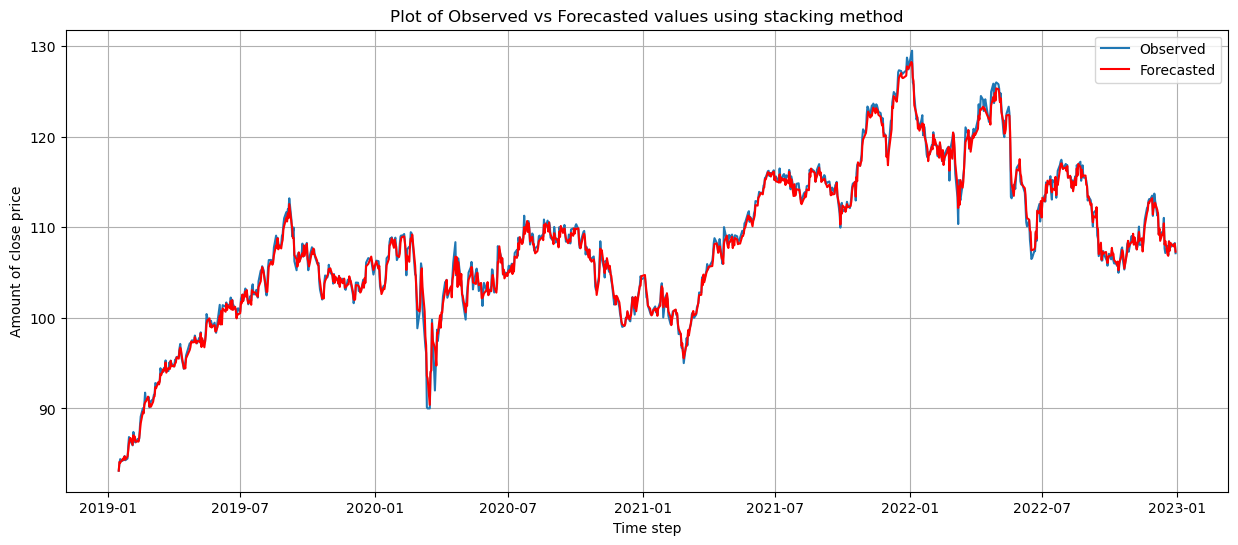

In [70]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_stack['close'], label='Observed')
plt.plot(combined_stack[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

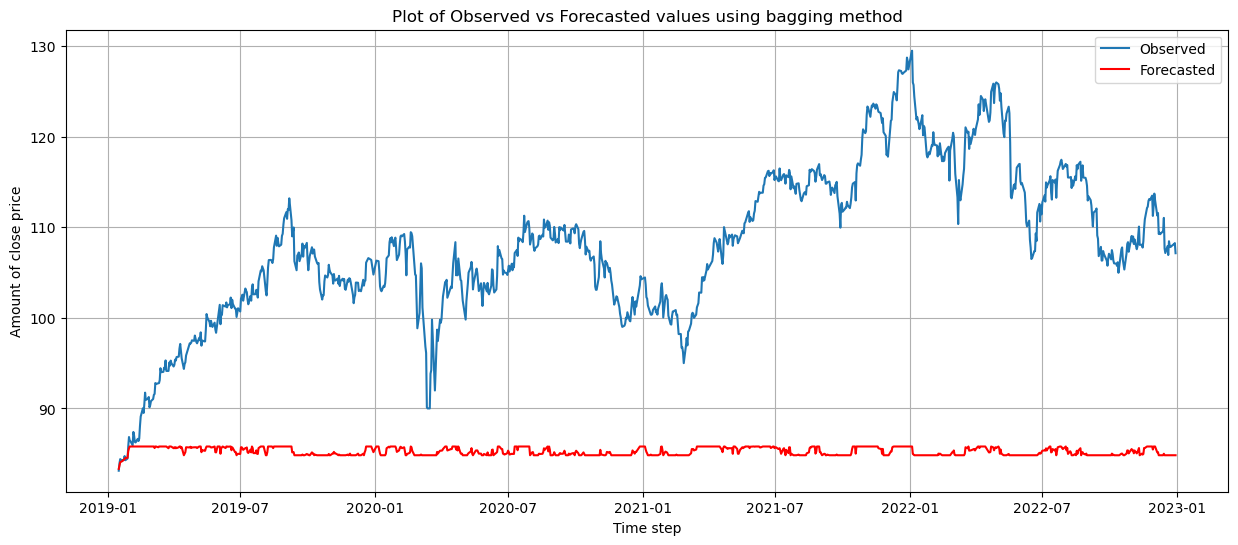

In [71]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

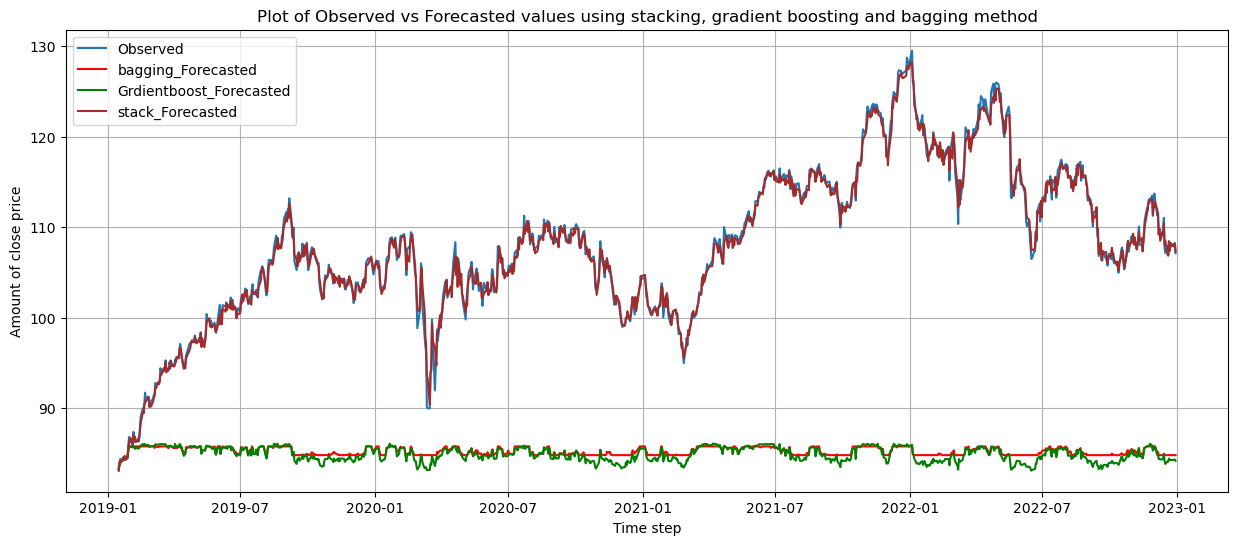

In [72]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='bagging_Forecasted')
plt.plot(combined[0], color='green', label='Grdientboost_Forecasted')
plt.plot(combined_stack[0], color='brown', label='stack_Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking, gradient boosting and bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('Nestleresult.png')
plt.show()

In [73]:
from prettytable import PrettyTable
import joblib
import os
# Constructing the result summary table containing the scores for each model on  test dataset.

task1_result = PrettyTable()
task1_result.field_names = ["Regressor", "MAE on Test","MAPE on Test", "MinAE on Test", "MaxAE on Test", "MedAE on Test"]
task1_result.add_row(['RF Reg', 22.94, 0.21, 0.01, 43.72, 22.71])
task1_result.add_row(['XGboost', 23.65, 0.21, 0.11, 43.64, 23.48])
task1_result.add_row(['GradientBoost', 23.28, 0.21, 0.09, 43.93, 23.08])
task1_result.add_row(['Catboost', 23.44, 0.21, 0.08, 43.64, 23.17])
task1_result.add_row(['Bagging', 22.88, 0.21, 0.00, 43.71, 22.60])
task1_result.add_row(['Stacking', 0.46, 0.00, 0.00, 4.62, 0.36])

print('Result Summary for All Regressors :')
print(task1_result)

Result Summary for All Regressors :
+---------------+-------------+--------------+---------------+---------------+---------------+
|   Regressor   | MAE on Test | MAPE on Test | MinAE on Test | MaxAE on Test | MedAE on Test |
+---------------+-------------+--------------+---------------+---------------+---------------+
|     RF Reg    |    22.94    |     0.21     |      0.01     |     43.72     |     22.71     |
|    XGboost    |    23.65    |     0.21     |      0.11     |     43.64     |     23.48     |
| GradientBoost |    23.28    |     0.21     |      0.09     |     43.93     |     23.08     |
|    Catboost   |    23.44    |     0.21     |      0.08     |     43.64     |     23.17     |
|    Bagging    |    22.88    |     0.21     |      0.0      |     43.71     |      22.6     |
|    Stacking   |     0.46    |     0.0      |      0.0      |      4.62     |      0.36     |
+---------------+-------------+--------------+---------------+---------------+---------------+
